<a href="https://colab.research.google.com/github/MatheusLCouto/TAIA/blob/main/Palavras_chave_grapho_not%C3%ADcias.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
!pip install nltk
!pip install unidecode
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from unidecode import unidecode
from sklearn.feature_extraction.text import TfidfVectorizer
import collections

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# prompt: Tenho um arquivo df_processed.csv e gostaria que você carregasse ele em um dataframe do pandas

import pandas as pd
df = pd.read_csv('df_preprocessed_cop30.csv')


In [ ]:
#df = pd.read_csv("df_fusionado.csv")
df = pd.read_csv("df_preprocessed_cop30.csv")

In [ ]:
df.head(3)

,_id,Title,Abstract,BodyText,Published,URL,Keyword,Platform,manter_gemini,manter_liquid,manter_qwen,media_concordancia,parecer_final,Title_pp,Abstract_pp,BodyText_pp
0,67feab9e70fd850bec274768,Vereadora critica prefeito após Câmara aprova ...,NaN,A vereadora Marinor Brito criticou o prefeito...,2025-03-29T15:33:00.000Z,https://btmais.com.br/vereadora-critica-prefei...,cop30,BT Mais (Belém Trânsito),Sim,Sim,Sim,1.0,Sim,vereadora critica prefeito apos camara aprova ...,NaN,vereadora marinor brito criticou prefeito igor...
1,67feab9e70fd850bec274769,"Belém, sede da COP30, ocupa a 8ª pior posição ...",NaN,Os dados do Instituto Trata Brasil (ITB) most...,2025-03-20T01:13:07.000Z,https://btmais.com.br/belem-sede-da-cop30-ocup...,cop30,BT Mais (Belém Trânsito),Sim,Sim,Sim,1.0,Sim,belem sede cop30 ocupa 8a pior posicao ranking...,NaN,dados instituto trata brasil itb mostram cidad...
2,67feab9e70fd850bec27476a,Silveira diz que decisão sobre petróleo na Mar...,NaN,"Nesta segunda-feira, 17, o ministro de Minas ...",2025-03-18T01:18:28.000Z,https://btmais.com.br/silveira-decisao-petrole...,cop30,BT Mais (Belém Trânsito),Sim,Sim,Sim,1.0,Sim,silveira decisao petroleo margem equatorial na...,NaN,feira 17 ministro minas energia alexandre silv...


In [ ]:
# # prompt: Você deve iterar o dataframe df e pré-processador a coluna BodyText, criando outra coluna a ser chamada BodyText_preprocessed.
# #O pré-processamento padrão de mineração de textos, a saber: i) conversão para caixa-baixa; ii) conversão de acentuação: ã vira a, é vira e etc;
# #iii) remoção de stopwords em português usando nltk; iv) remoção de pontuação, números e caracteres especiais.



# def preprocess_text(text):
#   # i) conversão para caixa-baixa
#   text = text.lower()
#   # iii) remoção de stopwords em português usando nltk
#   stop_words = set(stopwords.words('portuguese'))
#   words = text.split()
#   text = ' '.join([word for word in words if word not in stop_words])
#   return text
#   # iv) remoção de pontuação, números e caracteres especiais
#   text = re.sub(r'[^a-z\s]', '', text)

#   # ii) conversão de acentuação
#   text = unidecode(text)

# df['BodyText_preprocessed'] = df['BodyText'].apply(preprocess_text)


In [ ]:
df.head(3)

,_id,Title,Abstract,BodyText,Published,URL,Keyword,Platform,manter_gemini,manter_liquid,manter_qwen,media_concordancia,parecer_final,Title_pp,Abstract_pp,BodyText_pp
0,67feab9e70fd850bec274768,Vereadora critica prefeito após Câmara aprova ...,NaN,A vereadora Marinor Brito criticou o prefeito...,2025-03-29T15:33:00.000Z,https://btmais.com.br/vereadora-critica-prefei...,cop30,BT Mais (Belém Trânsito),Sim,Sim,Sim,1.0,Sim,vereadora critica prefeito apos camara aprova ...,NaN,vereadora marinor brito criticou prefeito igor...
1,67feab9e70fd850bec274769,"Belém, sede da COP30, ocupa a 8ª pior posição ...",NaN,Os dados do Instituto Trata Brasil (ITB) most...,2025-03-20T01:13:07.000Z,https://btmais.com.br/belem-sede-da-cop30-ocup...,cop30,BT Mais (Belém Trânsito),Sim,Sim,Sim,1.0,Sim,belem sede cop30 ocupa 8a pior posicao ranking...,NaN,dados instituto trata brasil itb mostram cidad...
2,67feab9e70fd850bec27476a,Silveira diz que decisão sobre petróleo na Mar...,NaN,"Nesta segunda-feira, 17, o ministro de Minas ...",2025-03-18T01:18:28.000Z,https://btmais.com.br/silveira-decisao-petrole...,cop30,BT Mais (Belém Trânsito),Sim,Sim,Sim,1.0,Sim,silveira decisao petroleo margem equatorial na...,NaN,feira 17 ministro minas energia alexandre silv...


In [ ]:
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import nltk
from tqdm import tqdm
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab')

custom_stopwords = ['leandro', 'nao', 'ja', 'alem', 'quinta', 'disse', 'conheca', 'terca', 'dia', 'sao', 'tambem', 'apos', 'iria', 'leia', 'vamos', 'segunda', 'terca', 'quarta', 'sexta', 'sabado', 'domingo', 'feira',
 'afirmou', 'sera', 'respondem', 'mes', 'acredita', 'opiniao', 'ate', 'atras', 'ira', 'gracas', 'pedimos', 'shimoda', 'chiharu', 'trocou', 'sabia', 'demorou', 'procurou', 'horas', 'longas', 'vao', 'cobrara', 'folhamercado','newsletter', 'abaixo', 'inscreva', 'cita', 'torna',
                    'recebeu', 'apresenta', 'contratou', 'chefiar', 'esforco', 'vale', 'email', 'justamente', 'assumiu', 'porem', 'mostra', 'mesma', 'entrou', 'diarias', 'voltado', 'conheca', 'veio', 'tenta', 'comecara', 'todos', 'acontecendo'
                    'voce', 'disseram', 'virao', 'estao', 'so', 'lanca', 'elenca', 'alcanca', 'gongo', 'dona', 'bi', 'justificativa', 'janeiro', 'fevereiro', 'marco', 'abril', 'maio', 'junho', 'julho', 'agosto', 'setembro', 'outubro', 'novembro', 'dezembro', 'segunda', 'terca', 'quarta', 'quinta', 'sexta', 'sabado', 'domingo',
                    'tonar', 'integrara', 'chame', 'vivem', 'tera', 'tras', 'opcoes', 'km', 'bc', 'getty', 'images', 'elefante','elefantes', 'edicao', 'the', 'in', 'la', 'tfff', 'us', 'plenary', 'en', 'durante']

stop_words = set(stopwords.words('portuguese') + custom_stopwords)

stop_words.discard('para')

def process_string(s):
    proc_s = str(s).lower()

    proc_s = proc_s.replace("\n", " ")

    # Remover pontuações, números e caracteres especiais, exceto espaços e '*'
    # proc_s = re.sub('[^a-z\s*]+', '', proc_s)
    proc_s = re.sub(r'\(([^)]+)\)', r'\1', (proc_s)) #elimina apenas os parênteses e não as palavras dentro
    proc_s = re.sub(r'(?<!\w)\d+(?!\w)', '', proc_s)

    # Remover espaços vazios
    proc_s = ' '.join(proc_s.split())

    # Substituir '*' por espaço em branco
    proc_s = proc_s.replace('*', '')

    tokens = word_tokenize(proc_s)

    tokens = [word for word in tokens if word not in stop_words]

    proc_s = " ".join(tokens)
    return proc_s


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [ ]:
df['BodyText_pp'] = df['BodyText_pp'].str.replace(
    r'\bpresidente (luiz inacio|lula silva|inacio lula|lula)\b',
    'presidente lula', regex=True, case=False
)

# Depois, adicionar "presidente" apenas nos casos que NÃO têm
df['BodyText_pp'] = df['BodyText_pp'].str.replace(
    r'(?<!presidente )\b(luiz inacio|lula silva|inacio lula|lula)(?!\s+silva|inacio)\b',
    'presidente lula', regex=True, case=False
)

df['BodyText_pp'] = df['BodyText_pp'].str.replace(
    r'\b(cop 30|30ª conferencia partes|30a conferencia partes|cop|conferencia|30)\b',
    'cop30', regex=True, case=False
)
df['BodyText_pp'] = df['BodyText_pp'].str.replace(
    r'\b(foto leandro|leandro fonseca|fonseca data)\b',
    '', regex=True, case=False
)
# df['BodyText_pp'] = df['BodyText_pp'].str.replace(
#     r'\b(luiz inacio|lula silva|inacio lula|presidente luiz inacio)\b',
#     'presidente lula', regex=True, case=False
# )

In [ ]:
df['BodyText_pp'] = df['BodyText_pp'].apply(lambda text: process_string(text))

In [ ]:
# prompt: Você deverá criar um código para gerar e contar uni-gramas, bi-gramas, tri-gramas mais relevantes considerando tf-idf



# Função para gerar n-gramas
def generate_ngrams(text, n):
    words = text.split()
    ngrams = zip(*[words[i:] for i in range(n)])
    return [" ".join(ngram) for ngram in ngrams]

# Gerar uni-gramas, bi-gramas, tri-gramas
df['unigrams'] = df['BodyText_pp'].apply(lambda x: generate_ngrams(x, 1))
df['bigrams'] = df['BodyText_pp'].apply(lambda x: generate_ngrams(x, 2))
df['trigrams'] = df['BodyText_pp'].apply(lambda x: generate_ngrams(x, 3))

# Combine all n-grams for TF-IDF calculation
all_ngrams = df['BodyText_pp'].tolist()

# Calcular TF-IDF
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1, 3))
tfidf_matrix = tfidf_vectorizer.fit_transform(all_ngrams)

# Obter os nomes dos n-gramas
feature_names = tfidf_vectorizer.get_feature_names_out()

# Calcular a soma dos scores TF-IDF para cada n-grama em todos os documentos
tfidf_scores = tfidf_matrix.sum(axis=0).tolist()[0]

# Criar um dicionário com n-gramas e seus scores TF-IDF totais
ngram_tfidf_scores = dict(zip(feature_names, tfidf_scores))

# Ordenar os n-gramas por score TF-IDF em ordem decrescente
sorted_ngrams = sorted(ngram_tfidf_scores.items(), key=lambda item: item[1], reverse=True)

# Separar os n-gramas de volta em uni-gramas, bi-gramas e tri-gramas
unigrams_tfidf = [(ngram, score) for ngram, score in sorted_ngrams if len(ngram.split()) == 1]
bigrams_tfidf = [(ngram, score) for ngram, score in sorted_ngrams if len(ngram.split()) == 2]
trigrams_tfidf = [(ngram, score) for ngram, score in sorted_ngrams if len(ngram.split()) == 3]

# Imprimir os top N n-gramas (ajuste N conforme necessário)
N = 35
print(f"Top {N} Uni-gramas mais relevantes (TF-IDF):")
for ngram, score in unigrams_tfidf[:N]:
    print(f"{ngram}: {score:.4f}")

print(f"\nTop {N} Bi-gramas mais relevantes (TF-IDF):")
for ngram, score in bigrams_tfidf[:N]:
    print(f"{ngram}: {score:.4f}")

print(f"\nTop {N} Tri-gramas mais relevantes (TF-IDF):")
for ngram, score in trigrams_tfidf[:N]:
    print(f"{ngram}: {score:.4f}")


Top 35 Uni-gramas mais relevantes (TF-IDF):
cop30: 73.4365
presidente: 61.2298
brasil: 48.6570
belem: 45.5896
lula: 44.2075
amazonia: 39.5469
governo: 35.4335
paises: 34.6624
evento: 33.1757
climaticas: 26.4344
ano: 26.3136
clima: 25.8168
cidade: 24.7049
mudancas: 24.3481
desenvolvimento: 23.6337
obras: 23.5684
mundo: 23.4349
global: 23.0244
pais: 22.3673
acordo: 22.0264
capital: 20.8714
governador: 20.7424
nacoes: 20.6332
regiao: 20.0342
turismo: 19.2950
paraense: 19.2604
barbalho: 19.1323
climatica: 18.8827
cop29: 18.6401
rio: 18.6171
helder: 18.5678
ambiente: 18.5238
unidas: 18.3988
baku: 18.2518
pessoas: 18.0857

Top 35 Bi-gramas mais relevantes (TF-IDF):
presidente lula: 44.2075
mudancas climaticas: 22.5640
nacoes unidas: 18.3527
helder barbalho: 15.7354
capital paraense: 13.9118
cop30 nacoes: 12.3435
governo federal: 12.0392
governador helder: 11.6652
unidas mudancas: 11.2231
cop30 belem: 11.0263
climaticas cop30: 10.9382
mudanca clima: 10.8867
estados unidos: 10.5106
lula presid

In [ ]:
"""
Andrey:
termos_interesse_andrey_manual: ["comissão parlamentar inquérito", "cpi", "supremo tribunal federal", "stf",
                   "ministério público goiás", "polícia civil pernambuco", "apostas esportivas",
                   "ministério fazenda", "bruno henrique", "apostas online", "lavagem dinheiro", "jogos azar",
                   "gusttavo lima", "casas apostas", "redes sociais", "polícia civil", "cpi bets", "ministério público",
                   "bolsa família", "sites apostas", "governo federal", "projeto lei", "manipulação resultados", "empresas apostas",
                   "jogo tigrinho", "casa aposta", "rio janeiro", "mercado apostas", "polícia federal", "banco central", "virginia fonseca",
                   "bets",  "governo", "presidente", "polícia", "milhões", "futebol", "operação",
                   "ministro", "bilhões"]
"""

termos_interesse_jon = ["conferencia nacoes unidas", "gases efeito estufa", "presidente lula",
                        "mudanças climaticas", "nacoes unidas", "meio ambiente", "helder barbalho", "capital paraense", "governo federal", "estados unidos", "acordo paris",
                        "combustiveis fosseis", "aquecimento global", "cop30", "desenvolvimento sustentavel", "transicao energetica",
                        "amazonia", "brasil", "belem", "para", "obras", "turismo"]

In [ ]:
# prompt: Gere um código que identifique a presença de termos de interesse que estão na variável termos_interesse,
#dentro dos textos pré processados (BodyText_preprocessed do dataframe". E depois coloque a combinação par a par das ocorrências, separado por vírgula.
#Por exemplo, se em uma instância ocorre "jogo tigrinho", "governo" e "presidente", a saída vai ser ["jogo tigrinho, governo", "jogo tigrinho, presidente", "governo, presidente"].
#A saída pode ser um CSV com todas as ocorrências para todas as notícias.

import itertools

termos_interesse = termos_interesse_jon

def find_term_combinations(text, terms):
  found_terms = [term for term in terms if term in text]
  if len(found_terms) < 2:
    return []
  combinations = list(itertools.combinations(found_terms, 2))
  return [", ".join(sorted(comb)) for comb in combinations]

df['term_combinations'] = df['BodyText_pp'].apply(lambda x: find_term_combinations(x, termos_interesse))

# Para criar um CSV com as ocorrências:
# Expande a lista de combinações em múltiplas linhas, se necessário
df_combinations = df.explode('term_combinations')

# Filtra as linhas que realmente possuem combinações encontradas
df_combinations = df_combinations.dropna(subset=['term_combinations'])

# Seleciona as colunas desejadas para o CSV (ajuste conforme necessário)
df_output = df_combinations[['Title', 'term_combinations']] # Exemplo: usa Título e as combinações

# Salva em CSV
df_output.to_csv("termos_interesse_combinacoes.csv", index=False)

print("CSV 'termos_interesse_combinacoes.csv' gerado com sucesso.")

CSV 'termos_interesse_combinacoes.csv' gerado com sucesso.


In [ ]:
df2 = pd.read_csv("termos_interesse_combinacoes.csv")

In [ ]:
len(df2)

61305

In [ ]:
# prompt: Você deve percorrer df2 para verificar repetições. Por exemplo, caso para uma mesma notícia haja repetição de combinação, uma deve ser removida e impressa na saída. A repetição de uma combinação pode ser do tipo:  "termo1, termo1" - que é o mesmo termo repetido, ou "termo 1, termo 2" e "termo 2, termo 1". Manter só as do tipo "termo 1, termo 2", eliminando "termo 2, termo 1".

import pandas as pd
# Crie um conjunto para armazenar combinações já vistas (normalizadas) por notícia
seen_combinations = set()

# Crie uma lista para armazenar as linhas a serem mantidas
rows_to_keep = []

# Iterar sobre as linhas do DataFrame df2
for index, row in df2.iterrows():
    title = row['Title']
    combination = row['term_combinations']

    # Separa os termos na combinação e ordena para normalizar
    terms = sorted([term.strip() for term in combination.split(',')])

    # Cria uma chave única para a combinação e a notícia
    normalized_combination_key = f"{title}|{','.join(terms)}"

    # Verifica se a combinação (normalizada) para esta notícia já foi vista
    if normalized_combination_key not in seen_combinations:
        # Se não foi vista, adiciona ao conjunto de combinações vistas
        seen_combinations.add(normalized_combination_key)
        # E adiciona a linha à lista de linhas a serem mantidas
        rows_to_keep.append(row)
    else:
        # Se foi vista, imprime a linha removida
        print(f"Combinação repetida removida para a notícia '{title}': {combination}")

# Cria um novo DataFrame apenas com as linhas a serem mantidas
df2_cleaned = pd.DataFrame(rows_to_keep)

# Opcional: Você pode sobrescrever df2 com o DataFrame limpo
df2 = df2_cleaned

print("\nDataFrame df2 limpo, com repetições de combinações dentro da mesma notícia removidas.")
print(df2.head())


Combinação repetida removida para a notícia 'Planalto define quem comandará Secretaria Extraordinária para COP30': cop30, presidente lula
Combinação repetida removida para a notícia 'Planalto define quem comandará Secretaria Extraordinária para COP30': belem, presidente lula
Combinação repetida removida para a notícia 'Planalto define quem comandará Secretaria Extraordinária para COP30': obras, presidente lula
Combinação repetida removida para a notícia 'Planalto define quem comandará Secretaria Extraordinária para COP30': belem, cop30
Combinação repetida removida para a notícia 'Planalto define quem comandará Secretaria Extraordinária para COP30': cop30, obras
Combinação repetida removida para a notícia 'Planalto define quem comandará Secretaria Extraordinária para COP30': belem, obras
Combinação repetida removida para a notícia 'Novidades em hospedagem: hotéis que fazem sua estreia no Brasil em 2025': capital paraense, cop30
Combinação repetida removida para a notícia 'Novidades em h

In [ ]:
len(df2)

60814

In [ ]:
df2["term_combinations"].to_csv("adjacencias_cop30.csv")

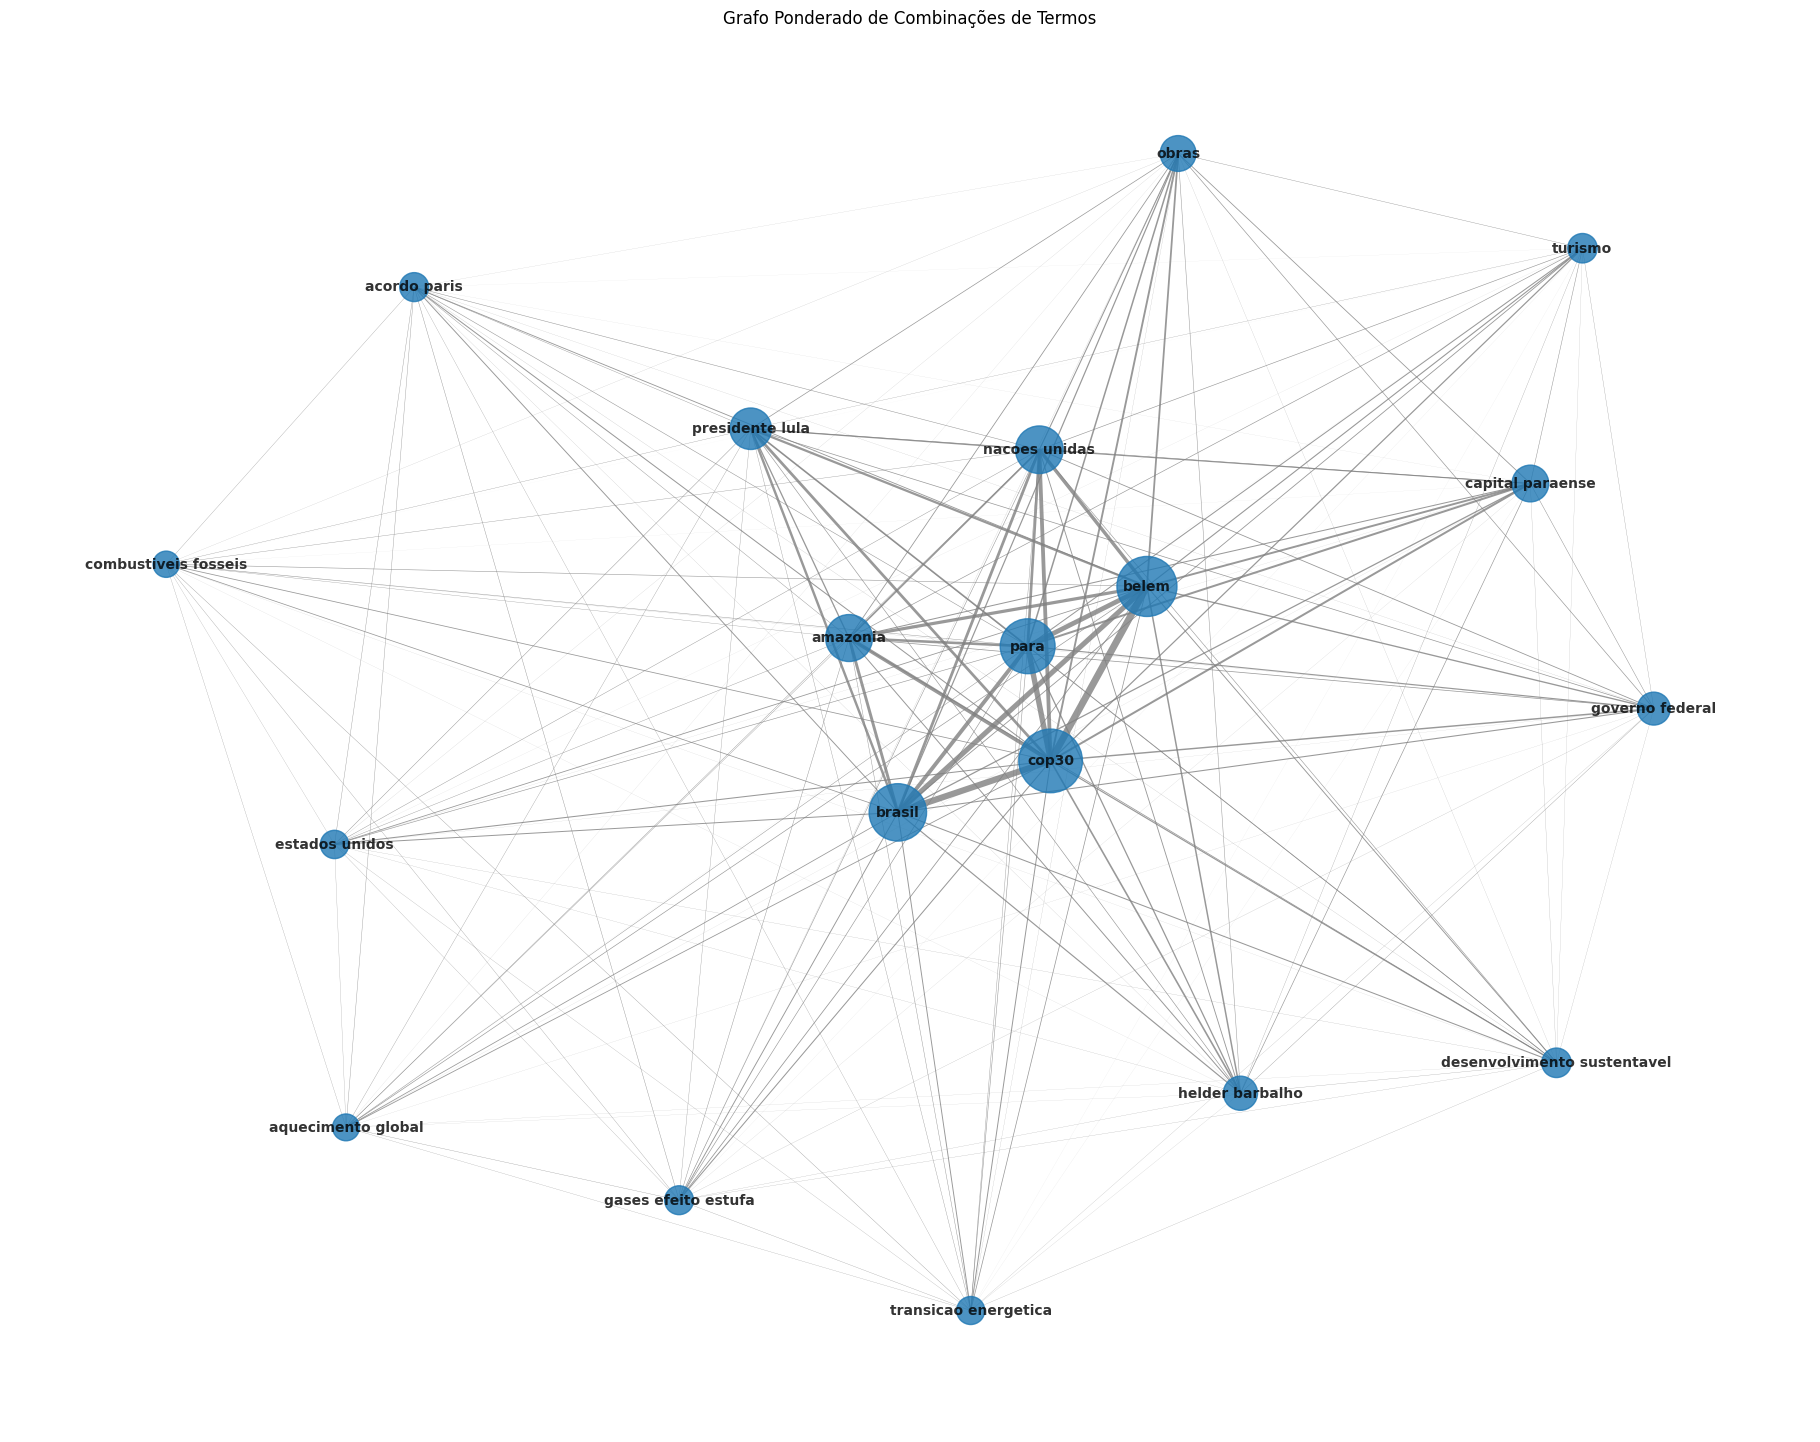

In [ ]:
# prompt: gere um grafo ponderado a partir da lista de adjacências dispostas na coluna term_combinations do df2.  Normalizar a ponderação e que o tamanho da fonte acompanhe.
# Quanto maior a ocorrência de um nó, maior o seu tamanho. Quanto mais forte a conexão (soma) maior a aresta.

!pip install networkx matplotlib

import networkx as nx
import matplotlib.pyplot as plt

# Contar a frequência de cada combinação de termos (aresta)
edge_counts = df2['term_combinations'].value_counts().reset_index()
edge_counts.columns = ['combination', 'weight']

# Criar o grafo
G = nx.Graph()

# Adicionar arestas com pesos baseados na frequência
for index, row in edge_counts.iterrows():
    term1, term2 = [term.strip() for term in row['combination'].split(',')]
    weight = row['weight']
    G.add_edge(term1, term2, weight=weight)

# Normalizar os pesos das arestas (opcional, mas pode ajudar na visualização)
max_weight = max(edge_counts['weight']) if not edge_counts.empty else 1
for u, v, data in G.edges(data=True):
    data['normalized_weight'] = data['weight'] / max_weight

# Contar a ocorrência de cada nó (termo)
node_counts = collections.Counter()
for combination in df2['term_combinations']:
    term1, term2 = [term.strip() for term in combination.split(',')]
    node_counts[term1] += 1
    node_counts[term2] += 1

# Normalizar o tamanho dos nós (opcional, mas pode ajudar na visualização)
max_node_count = max(node_counts.values()) if node_counts else 1
node_sizes = {node: count / max_node_count * 2000 + 100 for node, count in node_counts.items()} # Ajuste o multiplicador e o offset para controlar o tamanho

# Obter pesos normalizados para as arestas para a visualização
edge_weights = [data['normalized_weight'] * 5 for u, v, data in G.edges(data=True)] # Ajuste o multiplicador para controlar a espessura

# Posicionamento dos nós (layout)
pos = nx.spring_layout(G, k=0.3) # k ajusta a distância entre os nós

# Desenhar o grafo
plt.figure(figsize=(18, 14))
nx.draw(G, pos, with_labels=True, node_size=[node_sizes.get(node, 100) for node in G.nodes()],
        width=edge_weights, edge_color='gray', alpha=0.8,
        font_size=10, font_weight='bold')

# Adicionar os pesos das arestas como rótulos (opcional)
# edge_labels = nx.get_edge_attributes(G, 'weight')
# nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red')


plt.title("Grafo Ponderado de Combinações de Termos")
plt.axis('off') # Remove os eixos
plt.savefig('rede_cop30_2.png', dpi=300)
plt.show()


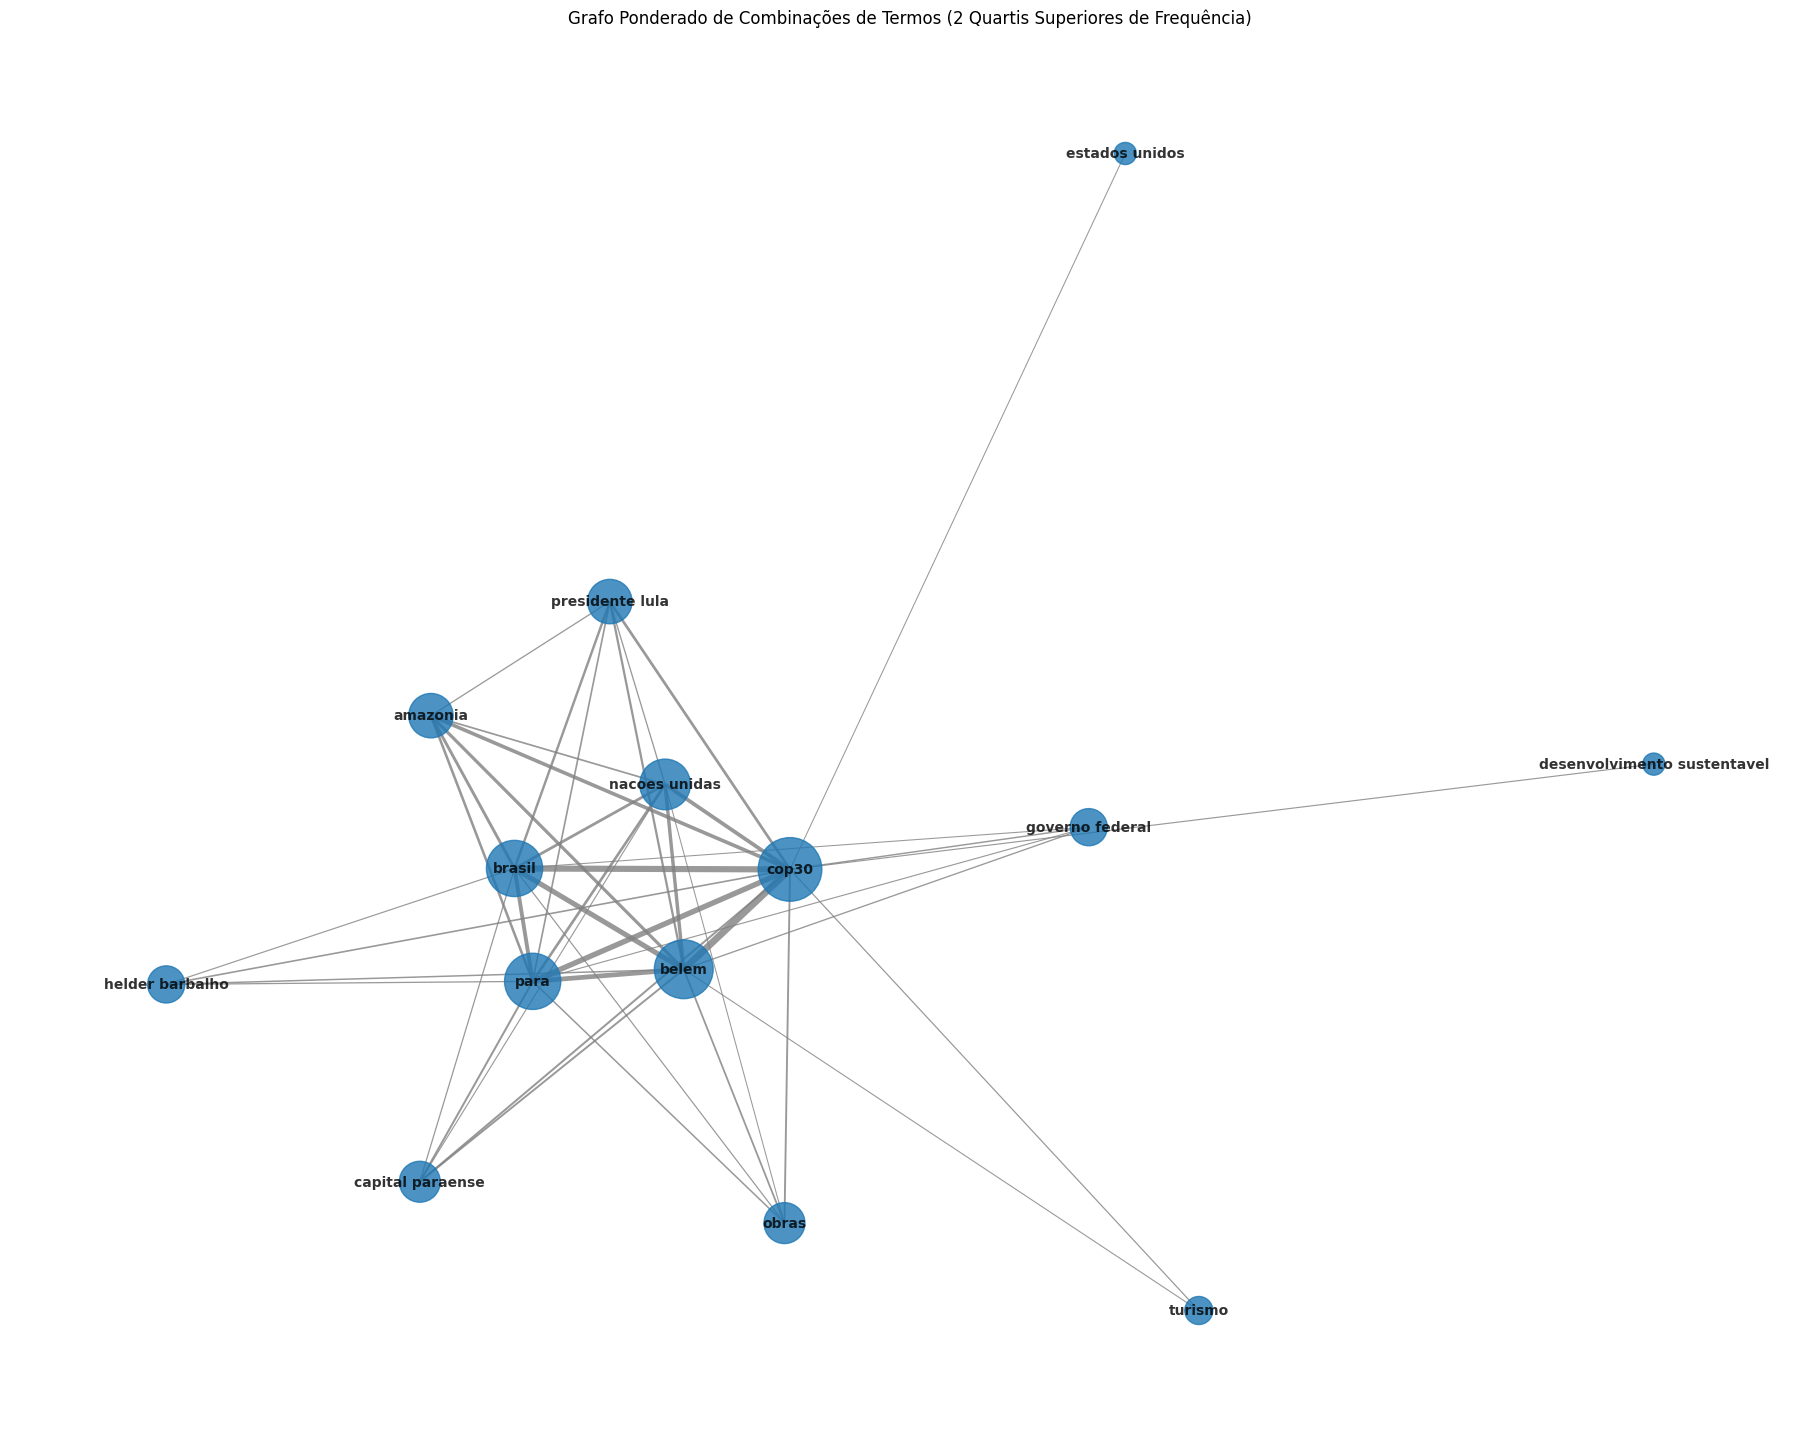

In [ ]:
# prompt: Para o grafo plotado anteriormente, filtre utilizando os dois quartis superiores em termos de frequencia de ocorrência e replote o grafo

import matplotlib.pyplot as plt
# Filtrar arestas (combinações de termos) com base nos quartis superiores de frequência
edge_weights = edge_counts['weight']
q3 = edge_weights.quantile(0.75) # Terceiro quartil

# Criar um novo DataFrame apenas com as combinações nos dois quartis superiores de frequência
filtered_edge_counts = edge_counts[edge_counts['weight'] >= q3].copy()

# Criar o grafo filtrado
G_filtered = nx.Graph()

# Adicionar arestas filtradas com pesos baseados na frequência
for index, row in filtered_edge_counts.iterrows():
    term1, term2 = [term.strip() for term in row['combination'].split(',')]
    weight = row['weight']
    G_filtered.add_edge(term1, term2, weight=weight)

# Normalizar os pesos das arestas no grafo filtrado
max_weight_filtered = max(filtered_edge_counts['weight']) if not filtered_edge_counts.empty else 1
for u, v, data in G_filtered.edges(data=True):
    data['normalized_weight'] = data['weight'] / max_weight_filtered

# Contar a ocorrência de cada nó (termo) no grafo filtrado
filtered_node_counts = collections.Counter()
for combination in filtered_edge_counts['combination']:
    term1, term2 = [term.strip() for term in combination.split(',')]
    filtered_node_counts[term1] += 1
    filtered_node_counts[term2] += 1

# Normalizar o tamanho dos nós no grafo filtrado
max_node_count_filtered = max(filtered_node_counts.values()) if filtered_node_counts else 1
node_sizes_filtered = {node: count / max_node_count_filtered * 2000 + 100 for node, count in filtered_node_counts.items()}

# Obter pesos normalizados para as arestas para a visualização do grafo filtrado
edge_weights_filtered = [data['normalized_weight'] * 5 for u, v, data in G_filtered.edges(data=True)]

# Posicionamento dos nós (layout) - pode ser o mesmo layout se quiser manter a posição relativa
pos_filtered = nx.spring_layout(G_filtered, k=0.3)

# Desenhar o grafo filtrado
plt.figure(figsize=(18, 14))
nx.draw(G_filtered, pos_filtered, with_labels=True, node_size=[node_sizes_filtered.get(node, 100) for node in G_filtered.nodes()],
        width=edge_weights_filtered, edge_color='gray', alpha=0.8,
        font_size=10, font_weight='bold')

plt.title("Grafo Ponderado de Combinações de Termos (2 Quartis Superiores de Frequência)")
plt.axis('off') # Remove os eixos
plt.show()

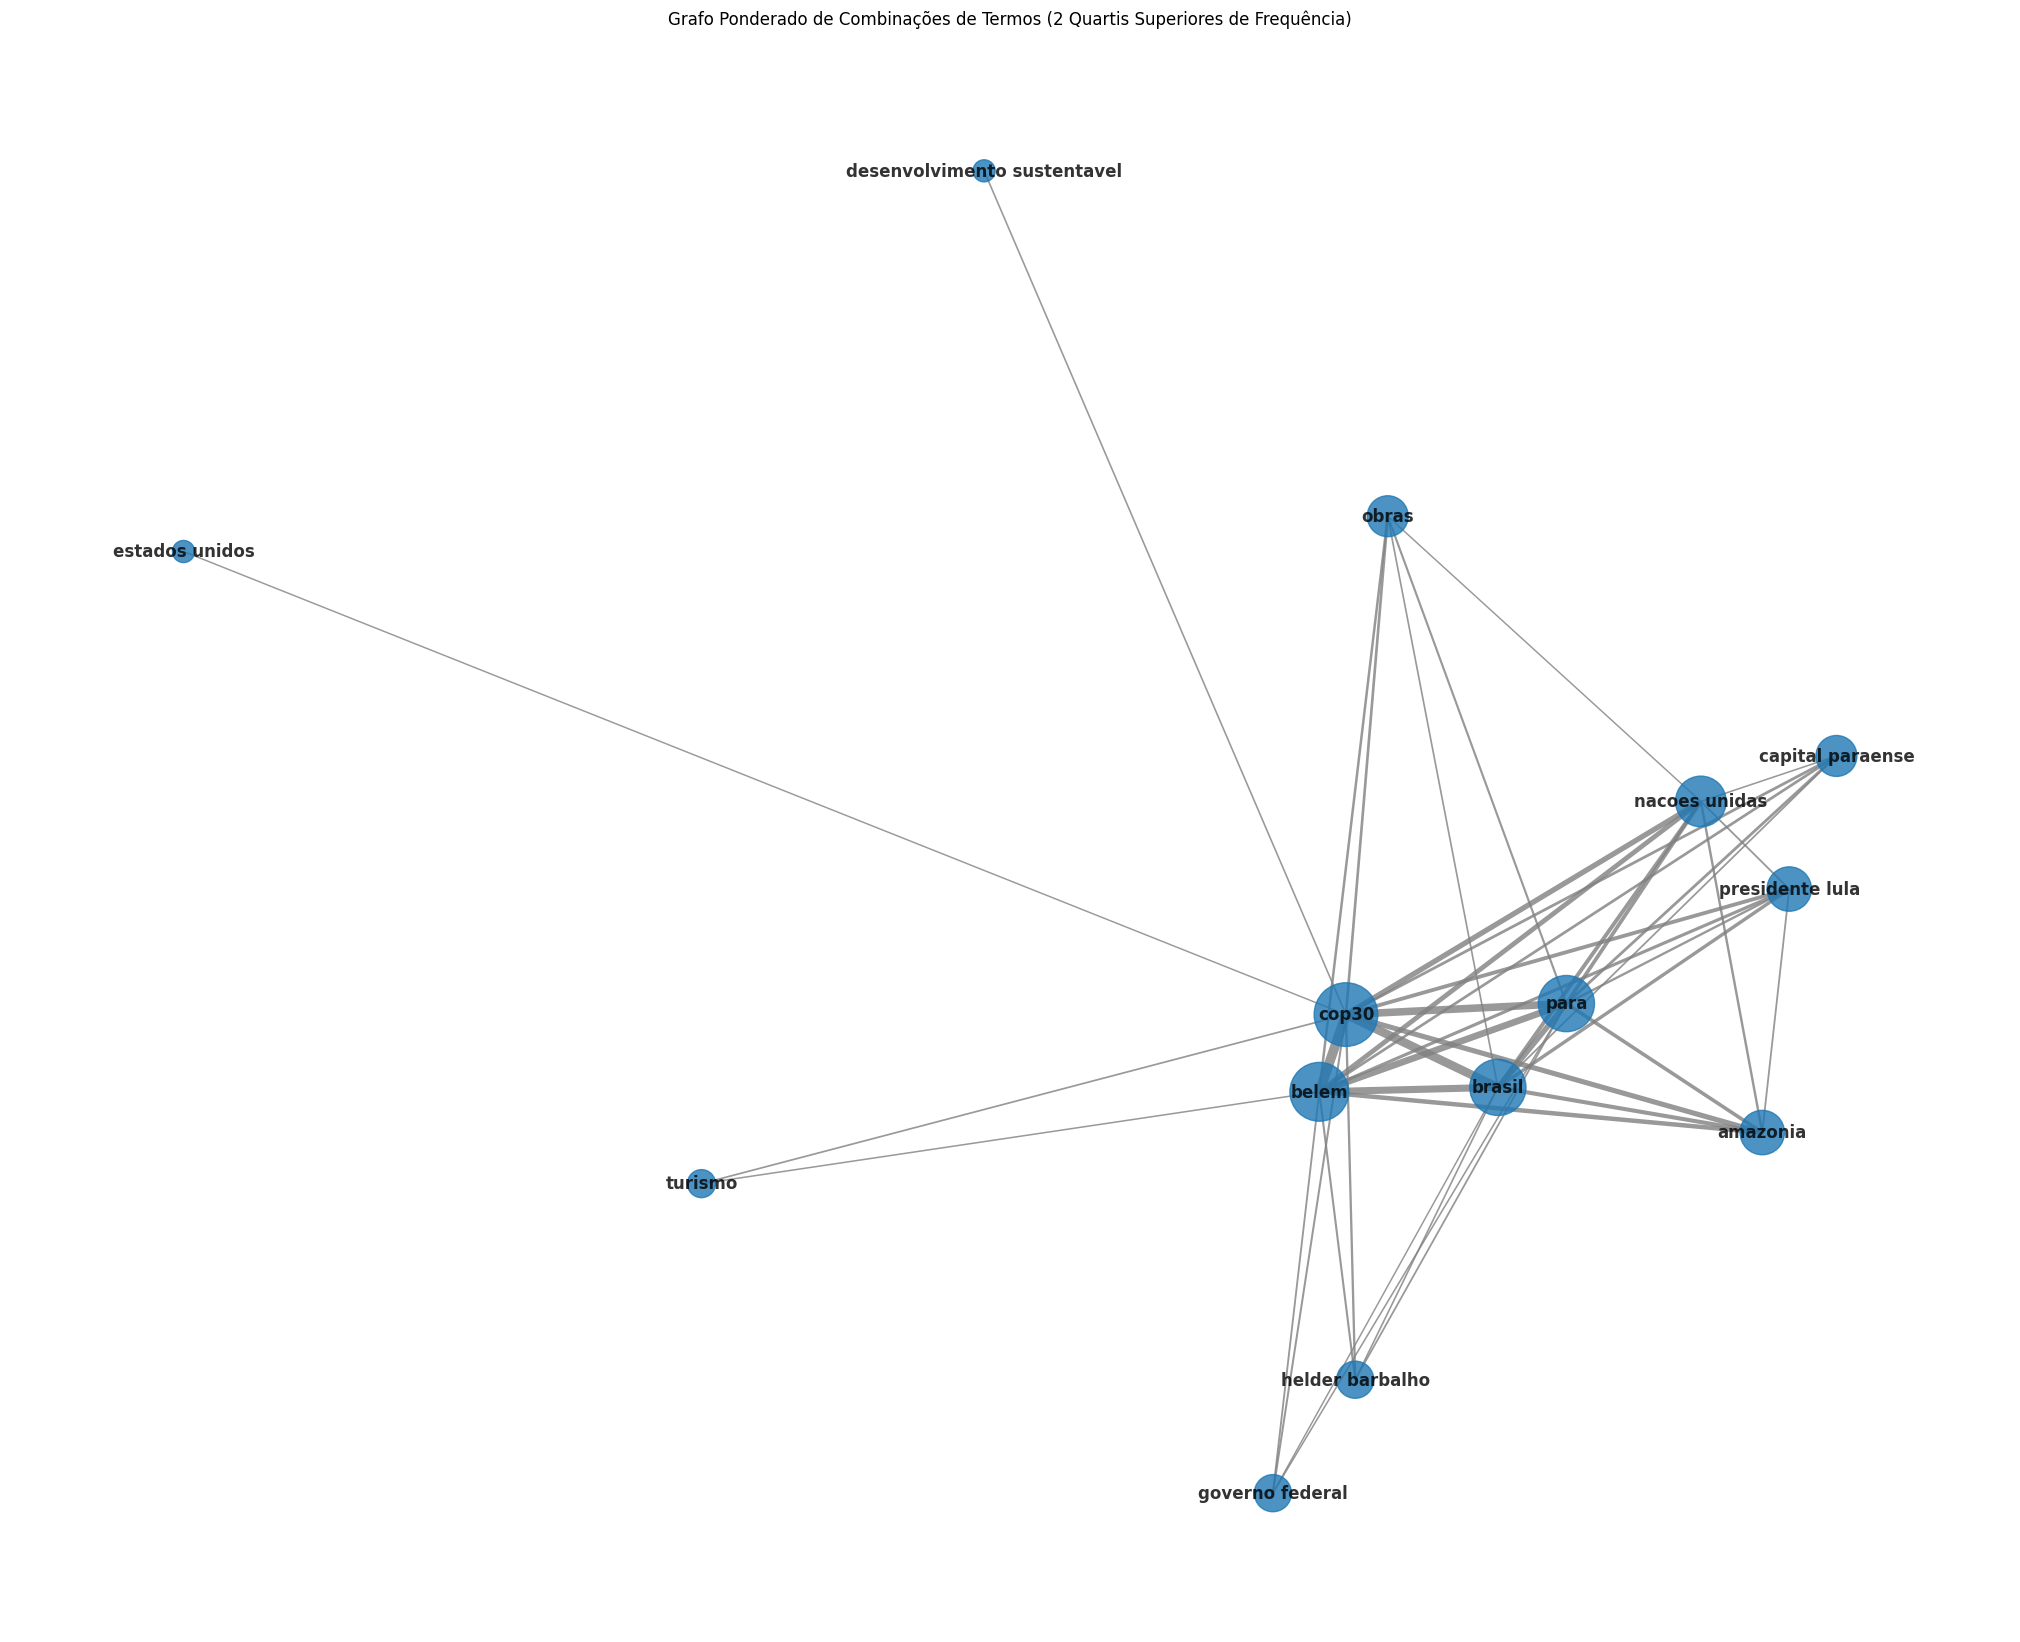

In [ ]:
# prompt: Melhor a distribuição do grafo e replote, considerando aumentar o tamanho da fonte e diminuir a esparcidade do mesmo.

import matplotlib.pyplot as plt
# Posicionamento dos nós (layout)
# Usando um k menor para diminuir a distância entre os nós (diminuir a esparcidade)
pos_filtered = nx.spring_layout(G_filtered, k=0.1) # k ajustado para 0.1

# Obter pesos normalizados para as arestas para a visualização do grafo filtrado
# Ajuste o multiplicador para controlar a espessura, mantendo a proporção se desejado
edge_weights_filtered = [data['normalized_weight'] * 7 for u, v, data in G_filtered.edges(data=True)] # Ajuste o multiplicador

# Desenhar o grafo filtrado
plt.figure(figsize=(20, 16)) # Aumentar o tamanho da figura
nx.draw(G_filtered, pos_filtered, with_labels=True, node_size=[node_sizes_filtered.get(node, 100) for node in G_filtered.nodes()],
        width=edge_weights_filtered, edge_color='gray', alpha=0.8,
        font_size=12, font_weight='bold') # Aumentar o tamanho da fonte

plt.title("Grafo Ponderado de Combinações de Termos (2 Quartis Superiores de Frequência)")
plt.axis('off') # Remove os eixos
plt.show()


In [ ]:
edges_data = []
for u, v, data in G_filtered.edges(data=True):
    edges_data.append({
        'source': u,
        'target': v,
        'weight': data['weight'],
        'normalized_weight': data['normalized_weight']
    })

edges_df = pd.DataFrame(edges_data)
edges_df.to_csv('edges.csv', index=False)
print("Arquivo 'edges.csv' gerado com sucesso.")


Arquivo 'edges.csv' gerado com sucesso.


In [ ]:
nodes_data = []
for node, count in filtered_node_counts.items():
    nodes_data.append({
        'node': node,
        'count': count,
        'normalized_size': node_sizes_filtered[node]
    })

nodes_df = pd.DataFrame(nodes_data)
nodes_df.to_csv('nodes.csv', index=False)
print("Arquivo 'nodes.csv' gerado com sucesso.")

Arquivo 'nodes.csv' gerado com sucesso.
